# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03I/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ix264-00001-00006,"['--disable-interlaced', '--bit-depth=all', '-...",65.324,62.969,2.193,2845544
1,ix264-00001-00015,"['--disable-asm', '--bit-depth=all', '--chroma...",33.407,31.499,1.804,2223376
2,ix264-00001-00012,"['--disable-interlaced', '--bit-depth=8', '--c...",37.279,35.798,1.379,1914320
3,ix264-00001-00014,"['--disable-asm', '--disable-thread', '--disab...",17.675,16.578,1.042,1463912
4,ix264-00001-00005,"['--disable-asm', '--disable-interlaced', '--b...",37.363,35.361,1.898,2442528
...,...,...,...,...,...,...
375,ix264-00020-00016,"['--disable-asm', '--disable-gpl', '--disable-...",18.156,17.053,1.046,1554512
376,ix264-00020-00013,"['--disable-asm', '--disable-interlaced', '--b...",20.215,18.975,1.187,1572712
377,ix264-00020-00018,"['--disable-asm', '--disable-gpl', '--disable-...",18.757,17.488,1.213,1564568
378,ix264-00020-00003,"['--disable-asm', '--disable-gpl', '--disable-...",33.900,32.067,1.735,2278824


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size,Br0,Br1,Br2
0,ix264-00001-00006,"['--disable-interlaced', '--bit-depth=all', '-...",65.324,62.969,2.193,2845544,ix264,00001,00006
1,ix264-00001-00015,"['--disable-asm', '--bit-depth=all', '--chroma...",33.407,31.499,1.804,2223376,ix264,00001,00015
2,ix264-00001-00012,"['--disable-interlaced', '--bit-depth=8', '--c...",37.279,35.798,1.379,1914320,ix264,00001,00012
3,ix264-00001-00014,"['--disable-asm', '--disable-thread', '--disab...",17.675,16.578,1.042,1463912,ix264,00001,00014
4,ix264-00001-00005,"['--disable-asm', '--disable-interlaced', '--b...",37.363,35.361,1.898,2442528,ix264,00001,00005
...,...,...,...,...,...,...,...,...,...
375,ix264-00020-00016,"['--disable-asm', '--disable-gpl', '--disable-...",18.156,17.053,1.046,1554512,ix264,00020,00016
376,ix264-00020-00013,"['--disable-asm', '--disable-interlaced', '--b...",20.215,18.975,1.187,1572712,ix264,00020,00013
377,ix264-00020-00018,"['--disable-asm', '--disable-gpl', '--disable-...",18.757,17.488,1.213,1564568,ix264,00020,00018
378,ix264-00020-00003,"['--disable-asm', '--disable-gpl', '--disable-...",33.900,32.067,1.735,2278824,ix264,00020,00003


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                          \
Br1        00001   00002   00003   00004   00005   00006   00007   00008   
Br2                                                                        
00001        NaN  37.362  37.337  37.433  37.369  37.382  37.416  37.424   
00002     38.356     NaN  37.980  37.729  38.013  37.675  37.901  37.749   
00003     33.924  33.796     NaN  33.828  33.802  33.861  33.932  33.863   
00004     69.125  69.336  69.124     NaN  69.117  69.212  69.182  69.010   
00005     37.363  37.293  37.330  37.265     NaN  37.267  37.432  37.365   
00006     65.324  65.186  65.110  64.953  65.056     NaN  65.151  65.154   
00007     20.994  20.944  20.963  20.846  20.972  20.955     NaN  20.929   
00008     20.533  20.302  20.297  20.241  20.265  20.295  20.364     NaN   
00009     65.721  65.229  65.255  65.458  65.198  65.417  65.448  65.383   
00010     31.838  31.791  31.730  31.845  31.686  31.657  31.717  31.689   
00011     64.878  64.608  64.447  64.751  64.467  64.627  64.854  64.547   
00012     37.279  37.183  37.194  37.174  37.313  37.169  37.406  37.230   
00013     20.264  20.246  20.173  20.229  20.166  20.268  20.201  20.204   
00014     17.675  17.627  17.632  17.666  17.651  17.631  17.607  17.661   
00015     33.407  33.375  33.268  33.321  33.295  33.261  33.364  33.241   
00016     18.225  18.114  18.173  18.099  18.100  18.128  18.224  18.105   
00017     40.042  39.977  40.119  39.912  39.927  39.972  40.395  39.804   
00018     18.777  18.677  18.690  18.661  18.791  18.662  18.712  18.731   
00019     34.569  34.465  34.349  34.412  34.353  34.339  34.392  34.384   
00020     37.326  37.240  37.171  37.170  37.277  37.202  37.187  37.229   

                                                                               \
Br1     00009   00010   00011   00012   00013   00014   00015   00016   00017   
Br2                                                                             
00001  37.375  37.463  37.326  37.359  37.462  37.605  37.442  37.463  37.428   
00002  38.083  37.793  37.858  37.812  40.225  38.027  37.918  37.797  37.768   
00003  33.884  33.988  33.812  33.869  36.050  34.209  34.001  33.909  33.942   
00004  69.067  69.182  69.211  69.163  69.164  69.528  69.280  69.202  69.159   
00005  37.301  37.376  37.270  37.352  37.395  39.123  37.413  37.440  37.461   
00006  65.173  65.272  65.047  65.049  65.096  67.072  65.300  65.184  65.139   
00007  21.001  21.003  20.875  20.923  20.953  21.094  21.025  21.076  20.973   
00008  20.245  20.368  20.319  20.379  20.280  20.491  20.439  20.387  20.294   
00009     NaN  65.383  65.127  65.263  65.199  65.655  65.445  65.381  65.378   
00010  31.771     NaN  31.773  31.804  31.809  33.458  31.863  31.750  31.718   
00011  64.579  64.613     NaN  64.602  64.661  64.796  64.884  64.685  64.684   
00012  37.171  37.265  37.152     NaN  37.167  38.444  37.272  37.334  37.373   
00013  20.224  20.229  20.207  20.193     NaN  20.302  20.455  20.309  20.227   
00014  17.541  17.621  17.593  17.559  17.601     NaN  17.704  17.635  17.628   
00015  33.268  33.378  33.252  33.281  33.398  34.705     NaN  33.372  33.330   
00016  18.155  18.227  18.127  18.135  18.185  18.351  18.193     NaN  18.174   
00017  40.127  39.871  39.911  39.890  39.971  40.264  40.078  39.921     NaN   
00018  18.618  18.766  18.704  18.700  20.106  18.900  18.733  18.761  18.718   
00019  34.349  34.402  34.339  34.357  34.491  34.710  34.589  34.503  34.520   
00020  37.209  37.205  37.074  37.148  37.248  39.167  37.252  37.184  37.182   

                               
Br1     00018   00019   00020  
Br2                            
00001  37.406  37.563  37.430  
00002  37.769  37.875  37.756  
00003  33.874  33.964  33.900  
00004  69.240  69.395  69.341  
00005  37.331  37.322  37.360  
00006  65.218  65.019  65.216  
00007  20.960  21.010  20.979  
00008  20.346  20.389  20.253  
00009  65.553  65.358  65.267  
00010  31

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00011)"
00002,"(Build Time, 00006)"
00003,"(Build Time, 00002)"
00004,"(Build Time, 00008)"
00005,"(Build Time, 00004)"
00006,"(Build Time, 00004)"
00007,"(Build Time, 00004)"
00008,"(Build Time, 00004)"


In [6]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002   1938720.0        NaN  1938720.0  1938720.0  1938720.0  1938720.0   
00003   2278824.0  2278824.0        NaN  2278824.0  2278824.0  2278824.0   
00004   3047312.0  3047312.0  3047312.0        NaN  3047312.0  3047312.0   
00005   2442528.0  2442528.0  2442528.0  2442528.0        NaN  2442528.0   
00006   2845544.0  2845544.0  2845544.0  2845544.0  2845544.0        NaN   
00007   1601416.0  1601416.0  1601416.0  1601416.0  1601416.0  1601416.0   
00008   1657760.0  1657760.0  1657760.0  1657760.0  1657760.0  1657760.0   
00009   2836352.0  2836352.0  2836352.0  2836352.0  2836352.0  2836352.0   
00010   1749400.0  1749400.0  1749400.0  1749400.0  1749400.0  1749400.0   
00011   2838496.0  2838496.0  2838496.0  2838496.0  2838496.0  2838496.0   
00012   1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   
00013   1572712.0  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0   
00014   1463912.0  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0   
00015   2223376.0  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0   
00016   1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00017   2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00018   1564568.0  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0   
00019   2281776.0  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0   
00020   1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0   
00003  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00004  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0   
00005  2442528.0  2442528.0  2442528.0  2442528.0  2442528.0  2442528.0   
00006  2845544.0  2845544.0  2845544.0  2845544.0  2845544.0  2845544.0   
00007        NaN  1601416.0  1601416.0  1601416.0  1601416.0  1601416.0   
00008  1657760.0        NaN  1657760.0  1657760.0  1657760.0  1657760.0   
00009  2836352.0  2836352.0        NaN  2836352.0  2836352.0  2836352.0   
00010  1749400.0  1749400.0  1749400.0        NaN  1749400.0  1749400.0   
00011  2838496.0  2838496.0  2838496.0  2838496.0        NaN  2838496.0   
00012  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0        NaN   
00013  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0   
00014  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0   
00015  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0   
00016  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00017  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00018  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0   
00019  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0   
00020  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0   
00003  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00004  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,37.605,37.423421,37.326
00002,40.225,38.004421,37.675
00003,36.050,34.021474,33.796
00004,69.528,69.212526,69.010
00005,39.123,37.445211,37.265
00006,67.072,65.248368,64.953
00007,21.094,20.972368,20.846
00008,20.533,20.341421,20.241


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00004,69.528,69.212526,69.010
00009,65.721,65.374632,65.127
00006,67.072,65.248368,64.953
00011,64.884,64.656105,64.447
00017,40.395,40.017895,39.804
00002,40.225,38.004421,37.675
00001,37.605,37.423421,37.326
00005,39.123,37.445211,37.265


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

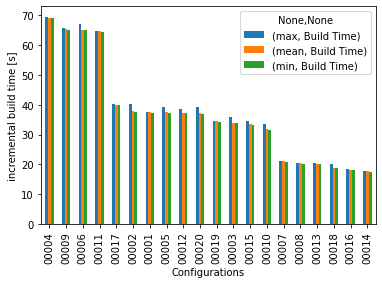

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

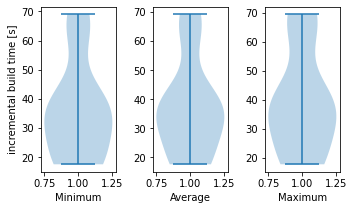

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a csv file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,37.362,37.337,37.433,37.369,37.382,37.416,37.424,37.375,37.463,37.326,37.359,37.462,37.605,37.442,37.463,37.428,37.406,37.563,37.430
00002,38.356,NaN,37.980,37.729,38.013,37.675,37.901,37.749,38.083,37.793,37.858,37.812,40.225,38.027,37.918,37.797,37.768,37.769,37.875,37.756
00003,33.924,33.796,NaN,33.828,33.802,33.861,33.932,33.863,33.884,33.988,33.812,33.869,36.050,34.209,34.001,33.909,33.942,33.874,33.964,33.900
00004,69.125,69.336,69.124,NaN,69.117,69.212,69.182,69.010,69.067,69.182,69.211,69.163,69.164,69.528,69.280,69.202,69.159,69.240,69.395,69.341
00005,37.363,37.293,37.330,37.265,NaN,37.267,37.432,37.365,37.301,37.376,37.270,37.352,37.395,39.123,37.413,37.440,37.461,37.331,37.322,37.360
00006,65.324,65.186,65.110,64.953,65.056,NaN,65.151,65.154,65.173,65.272,65.047,65.049,65.096,67.072,65.300,65.184,65.139,65.218,65.019,65.216
00007,20.994,20.944,20.963,20.846,20.972,20.955,NaN,20.929,21.001,21.003,20.875,20.923,20.953,21.094,21.025,21.076,20.973,20.960,21.010,20.979
00008,20.533,20.302,20.297,20.241,20.265,20.295,20.364,NaN,20.245,20.368,20.319,20.379,20.280,20.491,20.439,20.387,20.294,20.346,20.389,20.253
00009,65.721,65.229,65.255,65.458,65.198,65.417,65.448,65.383,NaN,65.383,65.127,65.263,65.199,65.655,65.445,65.381,65.378,65.553,65.358,65.267
